# MidTerm Project - Random Walks


In [ ]:
# setup
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import scipy
import sys
import os
from plotnine import (
    ggplot, aes, xlim, ylim, labs, guides, geom_point, geom_line
)

# TODO eventually, this should be a root config, or perhaps just separting out midtermproject into separate repo
# log_config is in parent dir, so need a little path hacking to make it cooperate
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.append(parent_dir)

import log_config # to override default and use loguru instead
log_config.setup_logging()

from loguru import logger

from python_utilities.random_walks import (
    one_dimensional_random_walk,
    find_one_dimensional_random_walk_extrema,
    summarize_one_dimensional_random_walk,
    summarize_one_dimensional_random_walk_extrema,
    
    two_dimensional_random_walk,
    find_two_dimensional_random_walk_extrema,
    summarize_two_dimensional_random_walk,
    summarize_two_dimensional_random_walk_extrema
)



In [33]:
# user configurable settings
npy_filename = pathlib.Path("data/g26perrindata.npy") # numpy export of dataset
mat_filename = pathlib.Path("data/g26perrindata.mat") # matlab export of dataset
csv_filename = pathlib.Path("data/g26perrindata.csv") # csv file dataset


## Guidelines {-}

The goal of this project is for you to apply physical modeling, simulation, probability, statistics, and data analysis, and to communicate your work in a clear and compelling way.

The final result of your work will be a Jupyter notebook.


# Presentation --- Jupyter Notebook {-}

Your notebook should address the following points. The format is flexible, but you should be sure to discuss the following.

- __Problem:__ What system did you study? What makes it interesting?
- __Model:__ What physical and/or mathematical models did you use?
- __Data:__ What data did you use?
- __Computation:__ Include readable code with helpful comments and beautiful graphics.
- __Analysis:__ What do the numbers and graphs mean?
- __Summary:__ What did you learn?

Your notebook should include plenty of graphics and explanatory text to help your audience understand your work and your conclusions.


# Guidelines {-}

You may choose one of the following projects. The problems and labs in our textbooks are useful starting points, but don't just answer the questions given. Then end result is a scientific presentation (in a Jupyter notebook).

- __Cancer clusters__ --- PMLS 4.11
- __Ion channels__ --- PMLS 4.14 and 4.15 (plus data from Dr. Kinder; see below)
- __Luria-Delbrück experiment__ --- PMLS 4.16 and 4.18
- __Flow cytometry__ --- PMLS 5.6
- __Fat tails in financial data__ --- PMLS 5.18 and 5.24
- __Random walks and diffusion__ --- PMLS 3.3 and PyGuide 7.1 and 7.2 (plus data from Dr. Kinder; see below)


# Timeline {-}

You cannot put together a good project at the last minute. Your goal should be to make steady progress throughout the rest of the term. 20 percent of your grade will come from meeting the following deadlines.

- Submit __your choice of project__ by Monday of Week 5 (02-02-2026).
- Submit __an outline and preliminary code__ by Friday of Week 5 (06-02-2026).
- Submit __your final notebook__ Wednesday of Week 6 (11-02-2026).

Submit all of your work through GitHub. To submit your choice of project, modify a file and then include something like "Started work on Luria-Delbruck" in your commit message. Your submissions for the outline, preliminary code, and final notebook will occur when you save your files to GitHub.


# Grade {-}

Your grade will be based on the following:

- progress along the way — 20 percent
- timely completion of the project — 20 percent
- presentation content — 30 percent
- presentation structure and style — 10 percent
- feedback to other students — 20 percent

You are expected to read other students' notebooks and provide feedback. For each notebook, you will identify

1. _at least_ **one** thing you learned
1. _at least_ **one** strength in the presentation
1. **one** suggestion for improvement
1. **one** question you have after viewing the notebook

I expect you to be honest and professional in your comments.


# Resources {-}

Your textbooks and your instructor are excellent resources, and I encourage you to make liberal use of both.

If you are interested in delving into journal articles, Google Scholar is a good starting point (\url{scholar.google.com}). Although access to many journals is restricted, many authors post their own publications on their personal web sites or sites like ResearchGate (\url{researchgate.net}). Google Scholar also provides links to PDFs on the right-hand side of the search results, when available.

I have some private subscriptions and may be able to help you track down a paper, too.


# Data for Ion Channels

You can find the data used to generate Figure 4.5 here: [00-Katz-Miledi](https://github.com/dr-kinder/pmls-data/tree/master/00-katz-miledi)

Incorporate this data into the analysis described in PMLS 4.14 and 4.15.

- Load the data and create a plot similar to Figure 4.5.
  (The two data sets in Fig. 4.5 are shifted by different amounts to reveal the difference in amplitude.)
- Extract the mean and variance of the "resting cell" and the "cell exposed to neurotransmitter".
- Use your model parameters to simulate oscilloscope traces and plot them alongside the data. Compare and contrast your model and the data, and comment. (They won't be identical, because this is a random process.)


# Data for Random Walks

You can find the data used to generate Figure 3.3 in _PMLS_ and Figure 7.1 in _A Student's Guide to Python_ here: [04-Brownian](https://github.com/dr-kinder/pmls-data/tree/master/04-Brownian)

- Load the data and create a plot similar to Fig. 3.3(b).
- The data gives the measured displacement during 30 second intervals. Use this to plot the __trajectory__ of the particle in a plot like 3.3(a) and 3.3(b). Compare to the trajectories you generated in your model and comment.
- Make a histogram of $\Delta r^2 = \Delta x^2 + \Delta y^2$ for the data. Compare with your histograms in 7.2(c) and comment.


# My Mid-Term Project: Random Walks


### Reference:


#### PMLS Problem 3.3:


> This problem introduces the "random walk," a physical model for Brownian motin. Get Dataset 4, which contains experimental data.

> A micrometer-scale particle undergoing Brownian motion was observed at successive times separated by $T = 30\text{s}$ intervals. In either of the data files, the two columns contain $\Delta_T x$ and $\Delta_T y$, the relative displacements of a particle from one observation to the next. There were many molecular collisions during each such interval.

> Figure 3.3a,b show the cumulative displacements, that is, the actual positions (relative to the start), throughout two such trajectories. You can see that some of the displacements are longer than others. So first, investigate the length-squared of the displacements:


> a.) Tabulate the values of $(\Delta_T x)^2 + (\Delta_T y)^2$ in each of the two experimental data sets. Find the range of values that occur, subdivide it into a suitable set of bins, classify each sample into the corresponding bin, and display the frequencies of occurrence as a histogram. [_Hint_: What is a "suitable" set of bins? To keep it simple, make all bins have equal width. They should be wide enough that at least some of them have lots of counts (say, more than $30$)--- enough to estimate accurately their probability. Bins should also be narrow enough to see the general trend of their probabilities.]

> Point **5a** (page 36) proposed that this motion arises from a huge number of molecular collisions in between each observation. To model those invisible individual collisions, imagine that a tiny chesspiece is placed at the center of a tiny chessboard, at a point we'll call $(0,0)$. Once per second, the chesspiece is moved along $x$.

$% TODO figure out how to box next para:$
> Each displacement is by a distance $L = 1 \mu \text{m}$ along either the $+x$ or $-x$ direction. The choice is random, each direction is equally probable, and each step is statistically independent of all the others. (first physical model for Brownian motion)

> At the same time, the chesspiece is also moved randomly by the same distance $L$ along the $\pm y$ direction; again, the choice is random, with equal probability for each choice, and independent of the $x$ step.

> In short, the elementary steps have $\Delta x = \pm L$ and $\Delta y = \pm L$. Imagine making many trajectories, all starting at the same point $(0,0)$.


**Answer:** 
Well, I've confirmed that there is _one_ dataset represented by three different files, but they all contain the same data. The comment in the `csv` file says:

> Jean Perrin's data on Brownian motion. x, y values of _endpoints_ of **508** random walks, in micrometers. P Nelson 6/2013 (emphasis mine)

So our dataset is $508$ rows of two columns (`x` and `y`, both floats). This question is asking values of $(\Delta_T x)^2 + (\Delta_T y)^2$, and my first interpretation is that each walk would be a sequence of positions and we'd use `np.cumsum()` or similar to aggregate the squared deltas at each time similar to how we did in the previous problems. The language in the `README.txt` was less than clear, but the text of the problem clarified that the $508$ entries in the data files represent not _endpoints_ like the `README.txt` claimed, but measurements every $\Delta_T = 30$ seconds, where $\Delta_T$ is the time between measurements, so this dataset represents a _single_ random 2-D walk, with $507$ steps from the starting point, resulting in a total of $508$ measurements. That all checks out, so let's begin!


In [34]:
# TODO look at figure 3.3a,b


First, let's identify what variables we know from the empirical data:


In [35]:
# dataset variables
delta_T = 30 # (seconds)
num_steps = 508 - 1 # starting position + 507 steps = 508 observations
start_point = {"x": 0.0, "y": 0.0}


In [36]:
summarize_two_dimensional_random_walk??


Signature:
summarize_two_dimensional_random_walk(
    walk_df,
    start_point={'x': 0, 'y': 0},
) -> 'None'
Source:   
def summarize_two_dimensional_random_walk(walk_df, start_point={"x": 0, "y": 0}) -> None:
    """
    summarize_two_dimensional_random_walk(): This function takes a DataFrame of a 2-D random walk and prints out the shape, and the average values for each dimension, as well as the average overall displacement.

    Args:
        walk_df (pd.DataFrame): A DataFrame of a 2-D random walk. The DataFrame should have columns `x` and `y`, as produced by the `two_dimensional_random_walk()` function.
        start_point (dict, optional): _description_. Defaults to {"x": 0, "y": 0}.
    """
    x = walk_df["x"]
    y = walk_df["y"]
    diff = (x - start_point["x"]) ** 2 + (y - start_point["y"]) ** 2  # ( = distance_from_start_point^2 = displacement)

    print(f"2-D Random Walk Summary:")
    print(f"The shape of the dataset is {walk_df.shape}.")
    print(f"The average x endpoin

In [37]:
# load up that dataset!
npy_filepath = pathlib.Path.cwd() / npy_filename
npy_data = np.load(npy_filepath)
npy_data = pd.DataFrame(npy_data, dtype = float, columns = ["x", "y"])


In [38]:
# Tabulate the values of $(\Delta_T x)^2 + (\Delta_T y)^2$
npy_data["delta_2"] = npy_data["x"]**2 + npy_data["y"]**2

logger.info(f"First 10 deltas in dataset: {npy_data["delta_2"][:10]=}")


2026-02-13 05:01:30.675 | INFO     | __main__:<module>:4 - First 10 deltas in dataset: npy_data["delta_2"][:10]=0    280.794452
1    215.712685
2    312.945172
3    285.334692
4    268.547232
5    203.998304
6    245.320092
7    189.840667
8    181.100192
9    186.766592
Name: delta_2, dtype: float64


In [39]:
# helper function
find_two_dimensional_random_walk_extrema??


Signature: find_two_dimensional_random_walk_extrema(walk_df: 'pd.DataFrame') -> 'pd.DataFrame'
Source:   
def find_two_dimensional_random_walk_extrema(walk_df: pd.DataFrame) -> pd.DataFrame:
    """
    find_two_dimensional_random_walk_extrema(): This function takes in a DataFrame of a random 2-D walk, calculates the min and max for the two dimensions over the course of the walk, as well as calculates the $Delta^2$ (displacement).

    Args:
        walk_df (pd.DataFrame): A pd.DataFrame of a random 2D walk. The DataFrame should have columns `x` and `y`, as produced by the `two_dimensional_random_walk()` function.

    Returns:
        pd.DataFrame: A pd.DataFrame with three columns: `x`, `y`, and `delta_2`. `x` and `y` are dictionaries with "min" and "max" values (columns of the same name) for the `x` and `y` dimensions, respectively. `delta_2` is the "min" and "max" values for the $Delta^2$ (displacement) for each step, also with matching named columns.
    """
    return pd.DataFram

Signature: find_two_dimensional_random_walk_extrema(walk_df: 'pd.DataFrame') -> 'pd.DataFrame'
Source:   
def find_two_dimensional_random_walk_extrema(walk_df: pd.DataFrame) -> pd.DataFrame:
    """
    find_two_dimensional_random_walk_extrema(): This function takes in a DataFrame of a random 2-D walk, calculates the min and max for the two dimensions over the course of the walk, as well as calculates the $Delta^2$ (displacement).

    Args:
        walk_df (pd.DataFrame): A pd.DataFrame of a random 2D walk. The DataFrame should have columns `x` and `y`, as produced by the `two_dimensional_random_walk()` function.

    Returns:
        pd.DataFrame: A pd.DataFrame with three columns: `x`, `y`, and `delta_2`. `x` and `y` are dictionaries with "min" and "max" values (columns of the same name) for the `x` and `y` dimensions, respectively. `delta_2` is the "min" and "max" values for the $Delta^2$ (displacement) for each step, also with matching named columns.
    """
    return pd.DataFram

In [40]:
# helper function
summarize_two_dimensional_random_walk_extrema??


Signature: summarize_two_dimensional_random_walk_extrema(extrema_df: 'pd.DataFrame') -> 'None'
Source:   
def summarize_two_dimensional_random_walk_extrema(extrema_df: pd.DataFrame) -> None:
    """
    summarize_two_dimensional_random_walk_extrema(): This function takes a pd.DataFrame of the extrema of a 2-D random walk as input (as generated by the `find_two_dimensional_random_walk_extrema()` function) and prints out the minimum and maximum values of the `x` and `y` columns, as well as the minimum and maximum values of the `delta_2` column.

    Args:
        extrema_df (pd.DataFrame): A pd.DataFrame with three columns: `x`, `y`, and `delta_2`. `x` and `y` are dictionaries with "min" and "max" values (columns of the same name) for the `x` and `y` dimensions, respectively. `delta_2` is the min and max values for the $Delta^2$ (displacement). This DataFrame is the output of the `find_two_dimensional_walk_extrema()` function.
    """
    x_min = f"x_min = {extrema_df['x']['min']:.6f}"
 

In [41]:
# Find the range of values that occur,
extrema = find_two_dimensional_random_walk_extrema(npy_data)
summarize_two_dimensional_random_walk_extrema(extrema)


Extrema for dataset:
        x_min = -16.236212          |          x_max = 14.657052         
        y_min = -16.838182          |          y_max = 14.529215         
      delta_2_min = 0.000000        |      delta_2_max = 312.945172      


In [42]:
# subdivide it into a suitable set of bins

# simply wrapper in case I need to adjust parameters for np.histogram_bin_edges later
def bin_edges(x, num_bins = 25):
    return np.histogram_bin_edges(x, bins = num_bins)

delta_2_bin_edges = bin_edges(npy_data["delta_2"])

logger.info(f"{delta_2_bin_edges=}")
logger.info(f"{delta_2_bin_edges.shape=}")


2026-02-13 05:01:32.532 | INFO     | __main__:<module>:9 - delta_2_bin_edges=array([1.23201000e-29, 1.25178069e+01, 2.50356137e+01, 3.75534206e+01,
       5.00712275e+01, 6.25890344e+01, 7.51068412e+01, 8.76246481e+01,
       1.00142455e+02, 1.12660262e+02, 1.25178069e+02, 1.37695876e+02,
       1.50213682e+02, 1.62731489e+02, 1.75249296e+02, 1.87767103e+02,
       2.00284910e+02, 2.12802717e+02, 2.25320524e+02, 2.37838331e+02,
       2.50356137e+02, 2.62873944e+02, 2.75391751e+02, 2.87909558e+02,
       3.00427365e+02, 3.12945172e+02])
2026-02-13 05:01:32.536 | INFO     | __main__:<module>:10 - delta_2_bin_edges.shape=(26,)


We can see that the bin edges length is $1$ more than the number of bins, which is what we would expect. The last entry in `delta_2_bin_edges` is the endpoint of the last bin, which I believe should be = `max(delta_2)`. Now that we have our bin boundaries, let's sort the data into their respective bins:

In [43]:
# classify each sample into the corresponding bin,
delta_2_counts, _ = np.histogram(npy_data["delta_2"], bins = delta_2_bin_edges)

logger.info(f"{delta_2_counts=}")
logger.info(f"{delta_2_counts.shape=}")
type(delta_2_counts)


2026-02-13 05:01:32.573 | INFO     | __main__:<module>:4 - delta_2_counts=array([86, 71, 62, 47, 46, 39, 19, 27, 14, 18, 18,  5,  6,  5, 14,  5,  5,
        3,  3,  5,  2,  3,  3,  1,  1])
2026-02-13 05:01:32.575 | INFO     | __main__:<module>:5 - delta_2_counts.shape=(25,)


numpy.ndarray

Now, after using `numpy` to calculate the histogram bin counts, we get an `np.ndarray` of length $25$, $1$ less than our bin edges. This checks out, as if we have $n$ bins, there will naturally be $n+1$ bin edges. Now, let's combine our bin edges and counts into a datatype that we can use to plot:

In [ ]:
# make a dataframe!
# we have our delta_@_bin_edges, as well as our actual values of delta_2, let's prep them nicely in a daaframe
delta_2_df = pd.DataFrame({
    "bins": delta_2_bin_edges,
    "counts": delta_2_counts
    })


In [ ]:
# TODO export to utils, or maybe need this for tick labels positions?
def get_bin_centers(bin_edges):
    return (bin_edges[:-1] + bin_edges[1:]) / 2


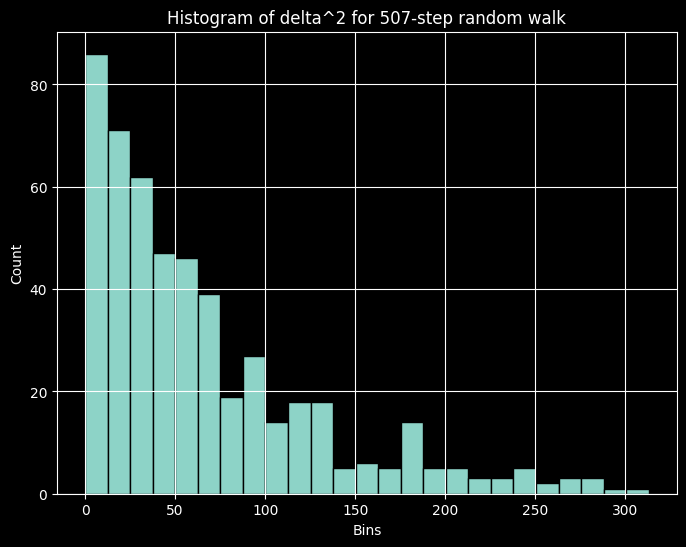

In [46]:
# display the frequencies of occurrence as a histogram

fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(delta_2_bin_edges[:-1], delta_2_counts, width=np.diff(delta_2_bin_edges), edgecolor = "black", align = "edge")
plt.grid(True)
plt.xlabel("Bins")
plt.ylabel("Count")
plt.title("Histogram of delta^2 for 507-step random walk")
plt.show()



> b.) Simulate $1,000$ such walks. To do this, at each step draw _two_ independent random variables, both equal to $\pm 1 \mu \text{m}$, and let these individual displacements accumulate. Repeat the steps in (a), but with your simulated total displacements after $500$ steps instead of the experimental data. Does your answer qualitatively resemble the experimental result in (a)?


From my understanding, this would mean to do a full random walk simulation, where in each step we move one unit +/- on the $x$ **and** $y$ axes. So my plan is thus:
0.) Prepare environment, helper functions, etc
1.) Simulate the $1,000$ 2D walks with $500$ steps
2.) Calculate $(\Delta_T x)^2 + (\Delta_T y)^2$ for each of the $500$-step walks
3.) Find the range of values that occur
4.) Subdivide it into a suitable set of bins
5.) Classify each sample into the corresponding bin
6.) Display the frequencies of occurrence as a histogram

In [47]:
two_dimensional_random_walk??


Signature:
two_dimensional_random_walk(
    num_steps: 'int' = 100,
    p_x_pos: 'float' = 0.5,
    p_y_pos: 'float' = 0.5,
    x_step: 'float' = 1.0,
    y_step: 'float' = 1.0,
    start_point: 'dict' = {'x': 0.0, 'y': 0.0},
) -> 'pd.DataFrame'
Source:   
def two_dimensional_random_walk(
    num_steps: int = 100,
    p_x_pos: float = 0.5,
    p_y_pos: float = 0.5,
    x_step: float = 1.0,
    y_step: float = 1.0,
    start_point: dict = {"x": 0.0, "y": 0.0},
) -> pd.DataFrame:
    """
    two_dimensional_random_walk(): This function simulates a 2-dimensional random walk in 2-D space. Starting at `start_point`, the simulation will take one `x_step` and one `y_step` step towards the positive direction (with probability `p_x_pos` and `p_y_pos` respectively) or in the negative direction (1 - `p_x_pos` and `1 - `p_y_pos` respectively).

    Note: This simulation allows for movement along the x and y axes during the same step.

    Args:
        num_steps (int, optional): The number of step

In [48]:
# now, let's run the actual simulation of 1,000 2D random walks of 500 steps each

# simulation settings
num_walks = 1_000
num_steps = 500
x_step = 1.0 # in micrometers
y_step = 1.0 # in micrometers
p_x_pos = 0.5 # probability of going in the positive x direction
p_y_pos = 0.5 # probability of going in the positive y direction
start_point = {"x": 0.0, "y": 0.0}

walks = [two_dimensional_random_walk(num_steps = num_steps, p_x_pos = p_x_pos, p_y_pos = p_y_pos, x_step = x_step, y_step = y_step, start_point = start_point) for i in range(num_walks)]
# note that the indices for the walks array are from 0 (initial conditions) to num_steps (representing the final position)

# print a small sample
walks[:1]
# pd.DataFrame({
#     "index": np.arange(0, num_walks),
#     "walks": walks_array,
#     })


[       t     x    y
 0      0   0.0  0.0
 1      1  -1.0  1.0
 2      2   0.0  2.0
 3      3  -1.0  1.0
 4      4  -2.0  0.0
 ..   ...   ...  ...
 496  496 -14.0  0.0
 497  497 -13.0 -1.0
 498  498 -12.0  0.0
 499  499 -13.0  1.0
 500  500 -14.0  0.0
 
 [501 rows x 3 columns]]

In [ ]:
# Tabulate the values of $(\Delta_T x)^2 + (\Delta_T y)^2$ in the data set. 

# adding delta_2 as a column for each individual walk's df
for df in walks:
    df["delta_2"] = (df["x"] - start_point["x"])**2 + (df["y"] - start_point["y"])**2
    
# TODO (a) Find the range of values that occur, 

for df in walks:
    df["min_delta_2"] = df["delta_2"].min()
    df["max_delta_2"] = df["delta_2"].max()
        
walks[0] # TODO look into ways to pretty print a nested df. maybe convert to json for output?

# TODO gotta figure out how to do this without resorting to looping over ever df in walks, then extract the deltas, compute min/max and I ... don't want to do that...

# TODO (a) subdivide it into a suitable set of bins

# TODO (a) classify each sample into the corresponding bin,

# TODO (a) display the frequencies of occurrence as a histogram.


,t,x,y,delta_2,min_delta_2,max_delta_2
0,0,0.0,0.0,0.0,0.0,298.0
1,1,-1.0,1.0,2.0,0.0,298.0
2,2,0.0,2.0,4.0,0.0,298.0
3,3,-1.0,1.0,2.0,0.0,298.0
4,4,-2.0,0.0,4.0,0.0,298.0
...,...,...,...,...,...,...
496,496,-14.0,0.0,196.0,0.0,298.0
497,497,-13.0,-1.0,170.0,0.0,298.0
498,498,-12.0,0.0,144.0,0.0,298.0
499,499,-13.0,1.0,170.0,0.0,298.0


**Answer:**


In [ ]:
# TODO compare with part a


> c.) Do your results in (a,b) suggest a possible mathematical form for the distribution of this quantity? How could you replot both the experimental and simulated data to check this idea? Try it. What could you change in your simulation to increase your confidence?


**Answer:**


In [ ]:
# TODO do this!


In [50]:
# TODO try it: resim/replot


**Answer (part 2):**


In [ ]:
# TODO me


#### PyGuide 7.1:


> a.) _Use the ideas in Section 6.2 to make a random walk trajectory, and then plot it_. To remove any distortion, use the command `plt.axis('square')` or `plt.axis('equal')` after making the plot.


In [51]:
# TODO make random walk trajectory

# TODO plot it

# TODO use axis command:
#plt.axis("square")
#plt.axis("equal")

#plt.show()


> b.) _Now make four such trajectories, and look at all four side by side_. Use `plt.figure()` to create a new figure window. You can access the individual subplots by using commands like `plt.subplot(2,2,1)` before the first `plot.plot` command, `plt.subplot(2,2,2)` before the second `plt.plot` command, and so on. Python may give each plot a different magnification. Consult `help(plt.xlim)` and `help(plt.axis)` to find out how to give each of your plots the same $x$ and $y$ limits.


In [52]:
# TODO make 4 trajectories

# TODO make new plot figure with 2 subplots with equal xlims/ylims


#### PyGuide 7.2:


> a.) _Once you have a code that works, increase the number of random walks from $100$ to $1,000$_. (_See Section 3.3.5_.) _Make a scatter plot of the end points_.


In [53]:
# TODO increase number of walks to 1_000 and rerun

# TODO scatter plot


> b.) _Use `plt.hist` to make a histogram of the `displacement` values_.


In [54]:
# TODO make histogram of dis values


> c.) _Make a histogram of the quantity `displacement**2`_.


In [55]:
# TODO make histogram of dis**2


> d.) _Your result from (c) may inspire a guess as to the mathematical form of the histogram. Use semilog and log-log axes to test for exponential or power law relationships_.


In [56]:
# TODO plot with semilog

# TODO plot with log-log


> e.) _Use `np.mean` to find the average value of `displacement**2` (the **mean-square displacement**) for a random walk of $1000$ steps_.


In [57]:
# TODO calculate mean dis**2 for random walk of 1_000 steps


> f.) _Find the mean-square displacement of a $4,000$-step walk_. If you wish to carry the analysis further, see if you can determine how the mean-square displacement depends on the number of steps in a random walk.


In [58]:
# TODO calculate mean dis**2 for random walk of 4_000 steps

# TODO try to generalize mean for arbitrary num steps


In [59]:
# TODO load data
logger.info("test")


2026-02-13 05:01:35.975 | INFO     | __main__:<module>:2 - test


In [60]:
# TODO create plot like Figure 3.3b


In [61]:
# TODO make trajectory plot like figure 3.3a and 3.3b, compare to simulated trajectories


In [62]:
# TODO plot histogram of \Delta r^2 = \Delta x^2 + \Delta y^2


**Answer:**


In [ ]:
# TODO compare to 7.2c and comment


---

My motivation: Of the selected topics, I feel this is most related to my background and chosen career field. 

# basic structure
## __Problem:__ What system did you study? What makes it interesting?
## __Model:__ What physical and/or mathematical models did you use?
## __Data:__ What data did you use?
## __Computation:__ Include readable code with helpful comments and beautiful graphics.
## __Analysis:__ What do the numbers and graphs mean?
## __Summary:__ What did you learn?

# Appendices